<h1>Загрузка Библиотек</h1>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
import os

import tensorflow as tf
import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2

<h1> Загрузка данных </h1>

In [2]:
import os
for dirname, _, filenames in os.walk('D:\Desktop\PneumoniaClassification'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

D:\Desktop\PneumoniaClassification\app.py
D:\Desktop\PneumoniaClassification\index.html
D:\Desktop\PneumoniaClassification\PneuClass(90%).h5
D:\Desktop\PneumoniaClassification\upload.html
D:\Desktop\PneumoniaClassification\chest-xray-pneumonia\chest_xray\chest_xray\test\NORMAL\IM-0001-0001.jpeg
D:\Desktop\PneumoniaClassification\chest-xray-pneumonia\chest_xray\chest_xray\test\NORMAL\IM-0003-0001.jpeg
D:\Desktop\PneumoniaClassification\chest-xray-pneumonia\chest_xray\chest_xray\test\NORMAL\IM-0005-0001.jpeg
D:\Desktop\PneumoniaClassification\chest-xray-pneumonia\chest_xray\chest_xray\test\NORMAL\IM-0006-0001.jpeg
D:\Desktop\PneumoniaClassification\chest-xray-pneumonia\chest_xray\chest_xray\test\NORMAL\IM-0007-0001.jpeg
D:\Desktop\PneumoniaClassification\chest-xray-pneumonia\chest_xray\chest_xray\test\NORMAL\IM-0009-0001.jpeg
D:\Desktop\PneumoniaClassification\chest-xray-pneumonia\chest_xray\chest_xray\test\NORMAL\IM-0010-0001.jpeg
D:\Desktop\PneumoniaClassification\chest-xray-pneumonia\

In [3]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 150
def get_training_data(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)

        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size))
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    data = np.array(data, dtype = object)
    return data

In [4]:
train = get_training_data('D:/Desktop/PneumoniaClassification/chest-xray-pneumonia/chest_xray/chest_xray/train')
test = get_training_data('D:/Desktop/PneumoniaClassification/chest-xray-pneumonia/chest_xray/chest_xray/test')
val = get_training_data('D:/Desktop/PneumoniaClassification/chest-xray-pneumonia/chest_xray/chest_xray/val')

OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'



<h1> Визуализация данных </h1>

<Axes: ylabel='count'>

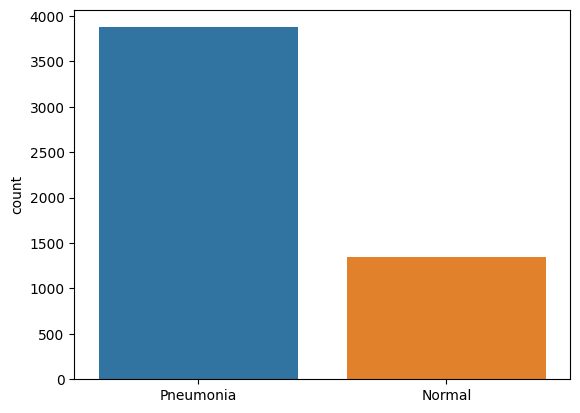

In [5]:
l = []
for iterator in train:
    if(iterator[1] == 1):
        l.append("Normal")
    else:
        l.append("Pneumonia")

sns.countplot(x = l)

Text(0.5, 1.0, 'NORMAL')

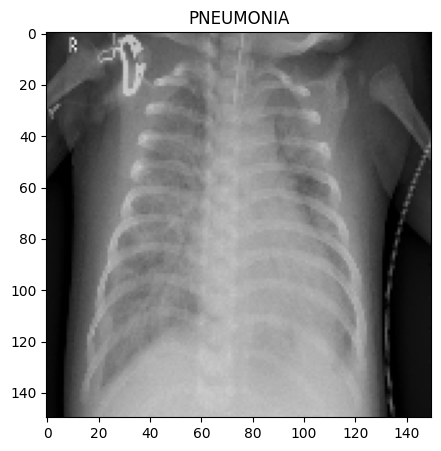

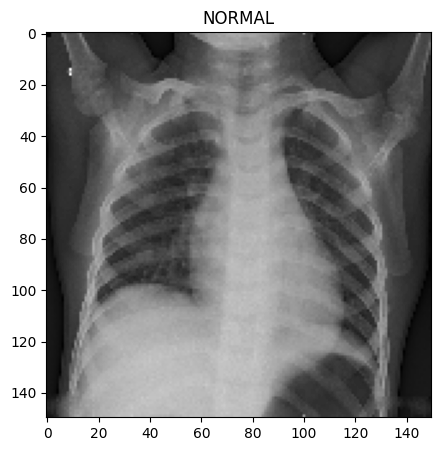

In [6]:
plt.figure(figsize=(5,5))
plt.imshow(train[0][0], cmap='gray')
plt.title(labels[train[0][1]])

plt.figure(figsize=(5,5))
plt.imshow(train[-1][0], cmap='gray')
plt.title(labels[train[-1][1]])

<h1> Работа с данными </h1>

In [7]:
xTrain = []
yTrain = []

xVal = []
yVal = []

xTest = []
yTest = []

for feature, label in train:
    xTrain.append(feature)
    yTrain.append(label)

for feature, label in test:
    xTest.append(feature)
    yTest.append(label)

for feature, label in val:
    xVal.append(feature)
    yVal.append(label)

print(len(xTest))
print(len(yTest))

624
624


<h1> Нормализация данных путём Ч/Б эффекта </h1>

In [8]:
xTrain = np.array(xTrain) /255
xTest = np.array(xTest) /255
xVal = np.array(xVal) /255

In [9]:
#Изменение масштаба изображения для обучения

xTrain = xTrain.reshape(-1, img_size, img_size, 1)
yTrain = np.array(yTrain)

xVal = xVal.reshape(-1, img_size, img_size, 1)
yVal = np.array(yVal)

xTest = xTest.reshape(-1, img_size, img_size, 1)
yTest = np.array(yTest)

<h1> Искусственное увеличение данных(data Augmentation)</h1>

In [10]:
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=30,
    width_shift_range=0.1,
    zoom_range=0.2,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False)

datagen.fit(xTrain)

<h1> Тренировка модели </h1>

In [11]:
model = Sequential()
model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (150,150,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1 , activation = 'sigmoid'))
model.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      320       
                                                                 
 batch_normalization (BatchN  (None, 150, 150, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 dropout (Dropout)           (None, 75, 75, 64)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 75, 75, 64)       2

In [12]:
LearningRateReduction = ReduceLROnPlateau(monitor='val_accuracy', patience=2, verbose=1, factor=0.3, min_lr=0.000000000001)

In [13]:

history = model.fit(
    datagen.flow(xTrain, yTrain, batch_size=32),
    epochs = 12,
    validation_data = datagen.flow(xVal, yVal),
    callbacks = [LearningRateReduction],
)

Epoch 1/12
163/163 [==============================] - 19s 73ms/step - loss: 0.5641 - accuracy: 0.8334 - val_loss: 11.7974 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/12
163/163 [==============================] - 12s 71ms/step - loss: 0.2658 - accuracy: 0.8949 - val_loss: 26.9399 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 3/12
163/163 [==============================] - ETA: 0s - loss: 0.2357 - accuracy: 0.9195
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
163/163 [==============================] - 12s 71ms/step - loss: 0.2357 - accuracy: 0.9195 - val_loss: 11.8445 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 4/12
163/163 [==============================] - 13s 82ms/step - loss: 0.1529 - accuracy: 0.9465 - val_loss: 0.8504 - val_accuracy: 0.6875 - lr: 3.0000e-04
Epoch 5/12
163/163 [==============================] - 11s 69ms/step - loss: 0.1369 - accuracy: 0.9505 - val_loss: 40.6739 - val_accuracy: 0.5000 - lr: 3.0000e-04
Epoch 6/12
163/163 [======================

In [14]:
print("Loss of the model is - ", model.evaluate(xTest,yTest)[0])

print("Accuracy of the model is - " , model.evaluate(xTest,yTest)[1]*100 , "%")

20/20 [==============================] - 1s 20ms/step - loss: 0.2470 - accuracy: 0.9022
Loss of the model is -  0.2470172494649887
20/20 [==============================] - 0s 18ms/step - loss: 0.2470 - accuracy: 0.9022
Accuracy of the model is -  90.22436141967773 %


<h1> Графический анализ модели </h1>

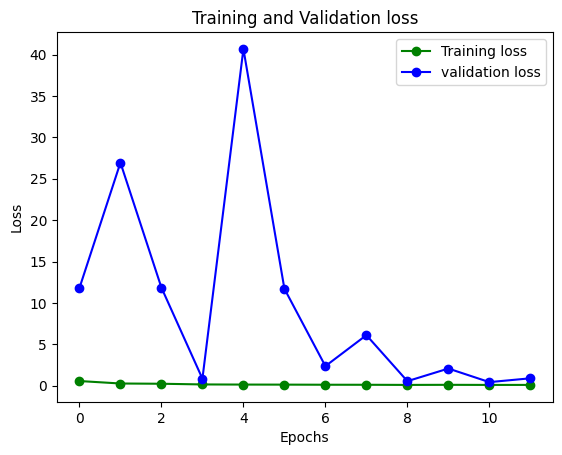

In [15]:
#Убедиться в том что 12 - корректное количество эпох для обученияи

loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,12)

plt.plot(epochs, loss_train, 'go-', label='Training loss')
plt.plot(epochs, loss_val, 'bo-', label='validation loss')

plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

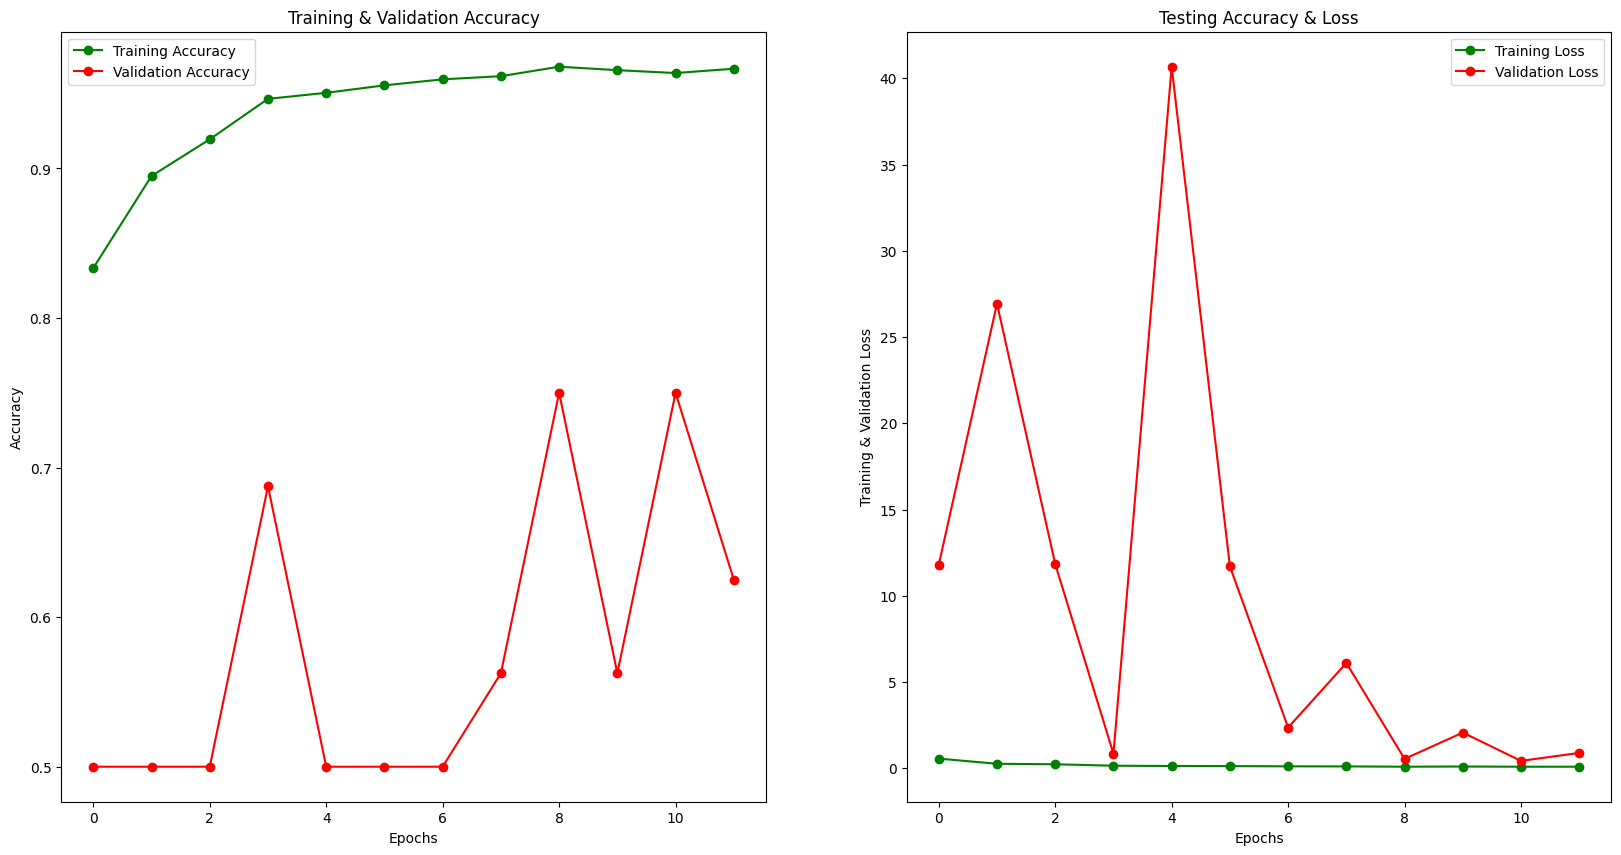

In [16]:
epochs = [i for i in range(12)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

In [17]:
predictions = model.predict(xTest)
predictions = np.where(predictions>0.5, 1, 0)
predictions[550:]

array([[0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]])

In [18]:
print(classification_report(yTest, predictions, target_names = ['Pneumonia (Class 0)','Normal (Class 1)']))

                     precision    recall  f1-score   support

Pneumonia (Class 0)       0.93      0.92      0.92       390
   Normal (Class 1)       0.86      0.88      0.87       234

           accuracy                           0.90       624
          macro avg       0.90      0.90      0.90       624
       weighted avg       0.90      0.90      0.90       624



In [19]:
cm = confusion_matrix(yTest,predictions)
cm

array([[358,  32],
       [ 29, 205]], dtype=int64)

In [20]:
cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])

<Axes: >

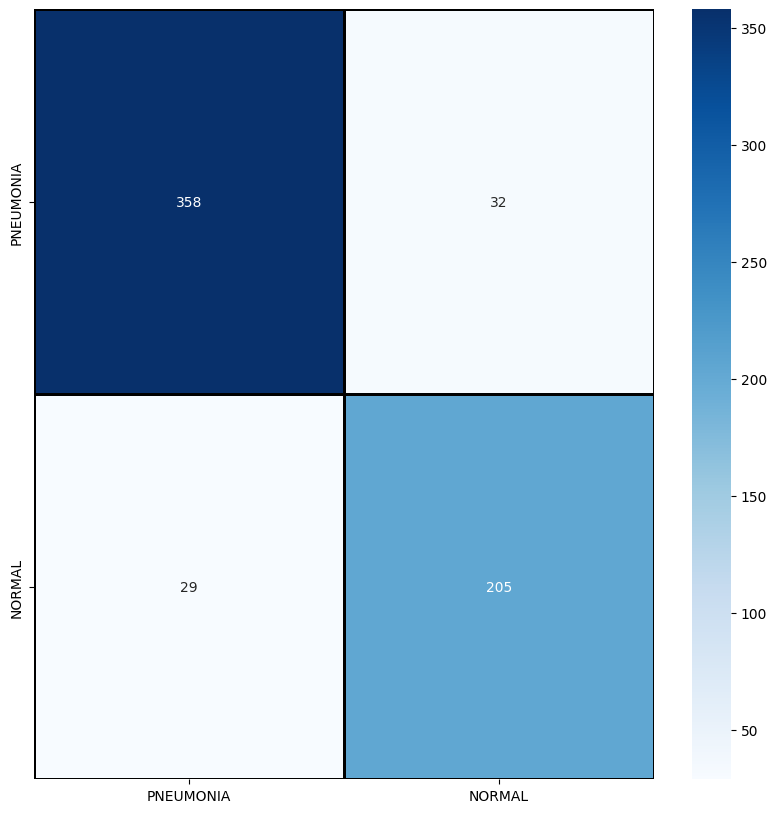

In [21]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = labels,yticklabels = labels)

In [22]:
correct = np.nonzero(predictions == yTest)[0]
incorrect = np.nonzero(predictions != yTest)[0]

C:\Users\siyov\AppData\Local\Temp\ipykernel_6020\859959624.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,2,i+1)


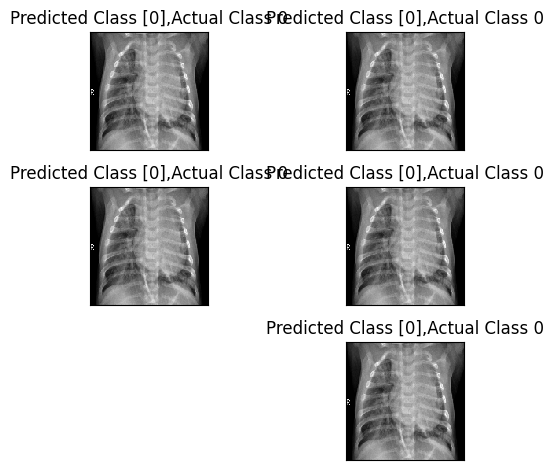

In [23]:
i = 0
for c in correct[:6]:
    plt.subplot(3,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(xTest[c].reshape(150,150), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[c], yTest[c]))
    plt.tight_layout()
    i += 1

C:\Users\siyov\AppData\Local\Temp\ipykernel_6020\2740532250.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,2,i+1)


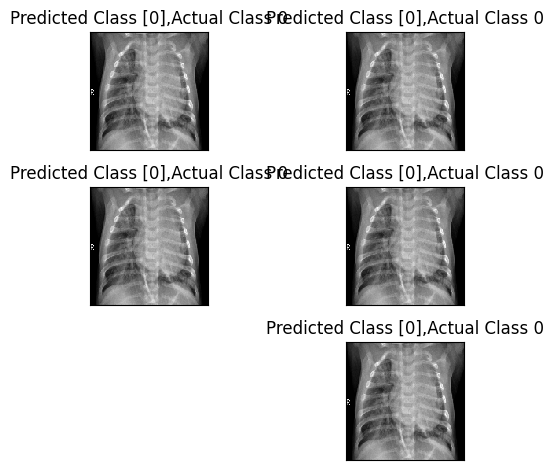

In [24]:
i = 0
for c in incorrect[:6]:
    plt.subplot(3,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(xTest[c].reshape(150,150), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[c], yTest[c]))
    plt.tight_layout()
    i += 1

In [25]:
# model.save("D:\Desktop\PneumoniaClassification/PneuClass(90%).h5")

In [26]:
newNN = keras.models.load_model("D:\Desktop\PneumoniaClassification/PneuClass(90%).h5")

img_size = 150
SamplePhoto = cv2.imread('D:\Desktop\PneumoniaClassification\chest-xray-pneumonia\chest_xray/train/PNEUMONIA/person3_bacteria_10.jpeg', cv2.IMREAD_GRAYSCALE)
resized_arr = cv2.resize(SamplePhoto, (img_size, img_size))
data = []
data.append([resized_arr, 0])
data = np.array(data, dtype = object)
SamplePhotoXTrain = []
SamplePhotoYTrain = []
for feature, label in data:
    SamplePhotoXTrain.append(feature)
    SamplePhotoYTrain.append(label)

SamplePhotoXTrain = np.array(SamplePhotoXTrain) /255
SamplePhotoXTrain = SamplePhotoXTrain.reshape(-1, img_size, img_size, 1)
newNN.predict(SamplePhotoXTrain)

array([[0.00025618]], dtype=float32)